In [21]:
#import necessary libraries
import pandas as pd
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
import numpy as np

In [2]:
pd.set_option('display.max_rows',5000)

In [71]:
with open('wine.csv','r') as f:
    print(f)

<_io.TextIOWrapper name='wine.csv' mode='r' encoding='cp1252'>


In [74]:
#import dataset
wine = pd.read_csv('wine.csv')

In [75]:
wine.columns

Index(['Unnamed: 0', 'country', 'description', 'designation', 'points',
       'price', 'province', 'region_1', 'region_2', 'variety', 'winery'],
      dtype='object')

# EDA

## ASSESS DATA QUALITY

In [76]:
wine

,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,variety,winery
0,0,US,This tremendous 100% varietal wine hails from ...,Martha's Vineyard,96,235.0,California,Napa Valley,Napa,Cabernet Sauvignon,Heitz
1,1,Spain,"Ripe aromas of fig, blackberry and cassis are ...",Carodorum Selecci√≥n Especial Reserva,96,110.0,Northern Spain,Toro,NaN,Tinta de Toro,Bodega Carmen Rodr√≠guez
2,2,US,Mac Watson honors the memory of a wine once ma...,Special Selected Late Harvest,96,90.0,California,Knights Valley,Sonoma,Sauvignon Blanc,Macauley
3,3,US,"This spent 20 months in 30% new French oak, an...",Reserve,96,65.0,Oregon,Willamette Valley,Willamette Valley,Pinot Noir,Ponzi
4,4,France,"This is the top wine from La B√©gude, named af...",La Br√ªlade,95,66.0,Provence,Bandol,NaN,Provence red blend,Domaine de la B√©gude
5,5,Spain,"Deep, dense and pure from the opening bell, th...",Numanthia,95,73.0,Northern Spain,Toro,NaN,Tinta de Toro,Numanthia
6,6,Spain,Slightly gritty black-fruit aromas include a s...,San Rom√°n,95,65.0,Northern Spain,Toro,NaN,Tinta de Toro,Maurodos
7,7,Spain,Lush cedary black-fruit aromas are luxe and of...,Carodorum √önico Crianza,95,110.0,Northern Spain,Toro,NaN,Tinta de Toro,Bodega Carmen Rodr√≠guez
8,8,US,This re-named vineyard was formerly bottled as...,Silice,95,65.0,Oregon,Chehalem Mountains,Willamette Valley,Pinot Noir,Bergstr√∂m
9,9,US,The producer sources from two blocks of the vi...,Gap's Crown Vineyard,95,60.0,California,Sonoma Coast,Sonoma,Pinot Noir,Blue Farm


In [6]:
# drop index column as it serves no value
wine.drop(['Unnamed: 0'],axis = 1,inplace = True)

### Checking for nulls

In [7]:
# Finding null values per column
missing = pd.DataFrame({'Column':[],'Number of missing datapoints':[]})
for i in range(len(wine.columns)):
    missing.loc[i,['Column']] = wine.columns[i]
    missing.loc[i,['Number of missing datapoints']] = wine.iloc[:,i].isnull().sum()

# look at the # of missing points in the first ten columns
missing = missing.sort_values(by = ['Number of missing datapoints'],ascending = False)
missing.reset_index(inplace = True, drop = True)
missing

,Column,Number of missing datapoints
0,region_2,611.0
1,designation,269.0
2,region_1,173.0
3,price,57.0
4,country,0.0
5,description,0.0
6,points,0.0
7,province,0.0
8,variety,0.0
9,winery,0.0


## Q) Would you undertake imputation?
## YES AND NO:
## REGION_2, REGION_1 and designation are qualitative variables therefore replacing nulls is unwise.
## Price can be mean imputed to fill nulls as it is a quantitative variable and hence it does not affect distribution

In [8]:
wine['price'] = wine['price'].fillna(round(wine['price'].mean(),2))

### Checking for duplicate rows

In [9]:
dups = wine[wine.duplicated(keep = False)].sort_values(by = ['country','description'])
dups

,country,description,designation,points,price,province,region_1,region_2,variety,winery
778,Chile,"Briny aromas of bell pepper, jalape√±o and can...",Justo,89,17.00,Leyda Valley,NaN,NaN,Sauvignon Blanc,Claro
936,Chile,"Briny aromas of bell pepper, jalape√±o and can...",Justo,89,17.00,Leyda Valley,NaN,NaN,Sauvignon Blanc,Claro
537,Chile,"Deep, pure cassis and red berry aromas are int...",Edici√≥n Limitada B,92,30.00,Colchagua Valley,NaN,NaN,Bordeaux-style Red Blend,Caliterra
873,Chile,"Deep, pure cassis and red berry aromas are int...",Edici√≥n Limitada B,92,30.00,Colchagua Valley,NaN,NaN,Bordeaux-style Red Blend,Caliterra
551,France,"A soft, stony scent of pebble and the faintest...",Rosenberg,90,24.00,Alsace,Alsace,NaN,Sylvaner,Domaine Barm√®s-Buecher
816,France,"A soft, stony scent of pebble and the faintest...",Rosenberg,90,24.00,Alsace,Alsace,NaN,Sylvaner,Domaine Barm√®s-Buecher
550,France,Aromas of this wine show considerable wood. On...,Bastion Premier Cru,90,59.00,Burgundy,Beaune,NaN,Chardonnay,Chanson P√®re et Fils
815,France,Aromas of this wine show considerable wood. On...,Bastion Premier Cru,90,59.00,Burgundy,Beaune,NaN,Chardonnay,Chanson P√®re et Fils
553,France,"Subtle hints of ripe, winter-stored apple on t...",L'Aplomb,90,20.00,Alsace,Alsace,NaN,White Blend,Domaine Riefl√©-Landmann
818,France,"Subtle hints of ripe, winter-stored apple on t...",L'Aplomb,90,20.00,Alsace,Alsace,NaN,White Blend,Domaine Riefl√©-Landmann


In [10]:
wine.shape[0] - (dups.shape[0]/2)

1061.0

In [11]:
wine2 = wine.drop_duplicates(keep = 'first')

In [12]:
wine2.shape[0]

1061

## Understanding distributions of the variables

In [2]:
plt.style.use('seaborn')
plt.hist(wine2['price'],bins = 15)
plt.axvline(wine2['price'].mean(), color = 'r')
plt.xlabel('price')
plt.ylabel('frequency')
plt.title('Distribution of price')
plt.tight_layout()
plt.show()

NameError: name 'plt' is not defined

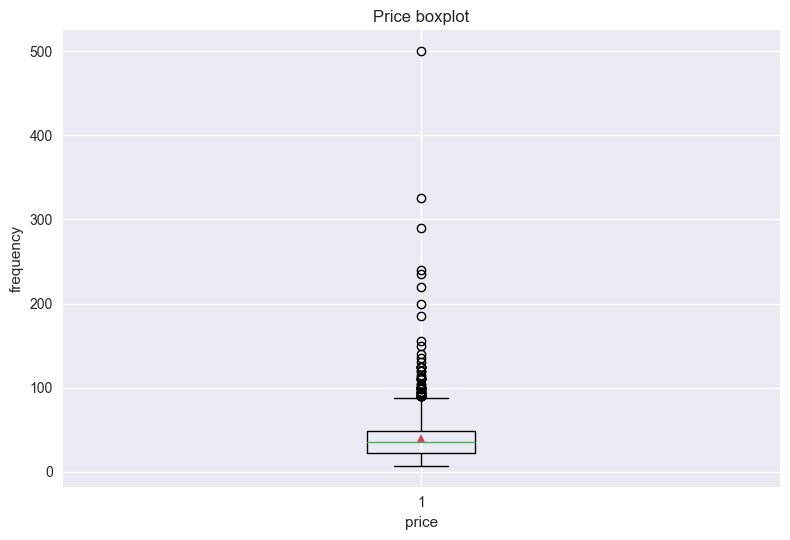

In [15]:
plt.boxplot(x = wine2['price'],showmeans = True)
plt.xlabel('price')
plt.ylabel('frequency')
plt.title('Price boxplot')
plt.tight_layout()
plt.show()

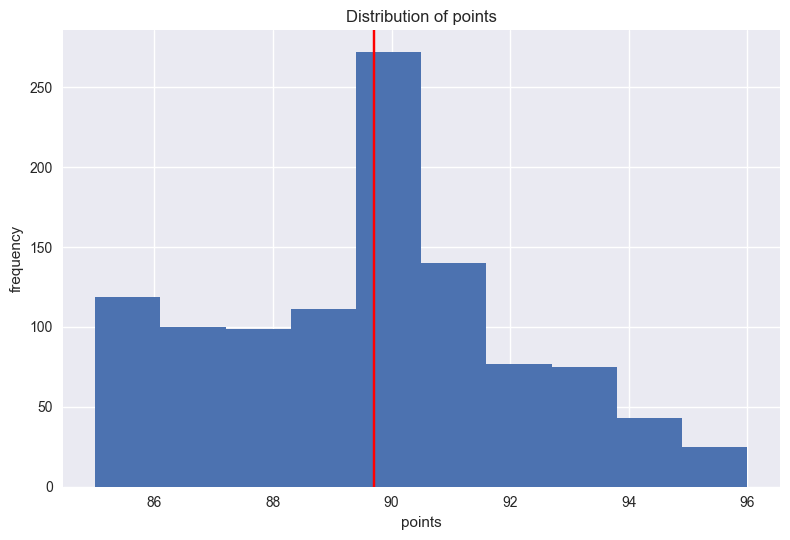

In [16]:
plt.hist(wine2['points'],bins = 10)
plt.axvline(wine2['points'].mean(), color = 'r')
plt.xlabel('points')
plt.ylabel('frequency')
plt.title('Distribution of points')
plt.tight_layout()
plt.show()

### Relationships between variables

In [17]:
def counter(x):
    y = list(x)
    if len(y) > 1:
        return 'sig'
    else:
        return 'not sig'

In [35]:
wine_count_df = wine2.groupby(['variety'])['variety'].apply(counter).reset_index(name = 'category')
wine3 = wine2.merge(wine_count_df,on = 'variety')
wine3['finaL_category'] = np.where(wine3['category'].eq('sig'),wine3['variety'],'OTHER')

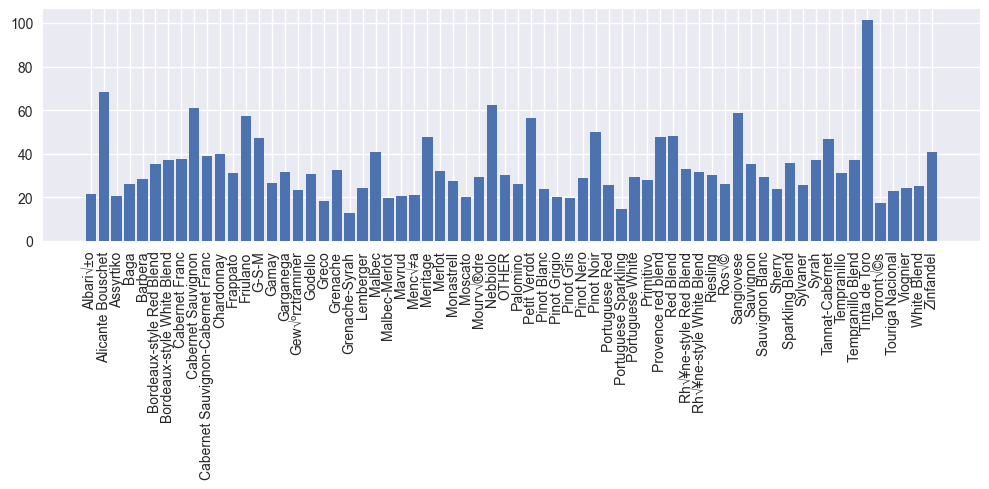

In [36]:
# Average Price by product
plt.figure(figsize=(10,5))
product = wine3.groupby(['finaL_category'])['price'].mean().reset_index(name = 'average price')
plt.bar(x = product['finaL_category'],height = product['average price'])
plt.xticks(rotation='vertical')
plt.tight_layout()
plt.show()

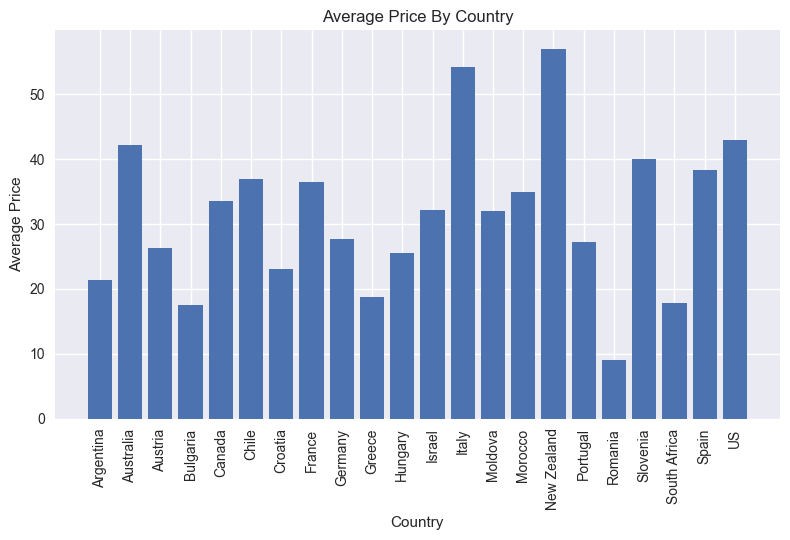

In [46]:
# Average price by country
country_price = wine3.groupby(['country'])['price'].mean().reset_index(name = 'Average price by Country')
country_price['Average price by Country'] = country_price['Average price by Country'].apply(lambda x: round(x,2))

plt.bar(x = country_price['country'],height = country_price['Average price by Country'])
plt.xticks(rotation='vertical')
plt.ylabel('Average Price')
plt.xlabel('Country')
plt.title('Average Price By Country')
plt.tight_layout()
plt.show()

In [42]:
wine3.groupby(['country'])['variety'].agg(lambda x: x.mode()).reset_index(name = 'Most Popular Variety')


,country,Most Popular Variety
0,Argentina,Malbec
1,Australia,Pinot Noir
2,Austria,"[Blauburgunder, Blaufr√§nkisch, Pinot Noir, St..."
3,Bulgaria,Mavrud
4,Canada,Riesling
5,Chile,Red Blend
6,Croatia,"[Posip, White Blend]"
7,France,Bordeaux-style Red Blend
8,Germany,Riesling
9,Greece,"[Assyrtiko, White Blend]"


C:\Users\HP\anaconda3\lib\site-packages\seaborn\axisgrid.py:703: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_args = [v for k, v in plot_data.iteritems()]
C:\Users\HP\anaconda3\lib\site-packages\seaborn\axisgrid.py:703: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_args = [v for k, v in plot_data.iteritems()]
C:\Users\HP\anaconda3\lib\site-packages\seaborn\axisgrid.py:703: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_args = [v for k, v in plot_data.iteritems()]


<Figure size 800x550 with 0 Axes>

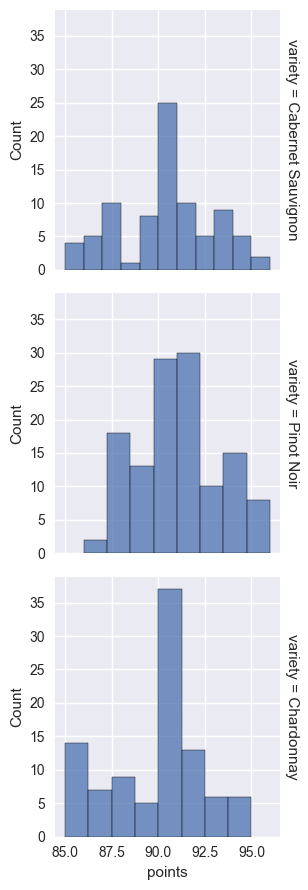

In [49]:
# Create a multi-plot grid for 

wine4 = wine3.loc[wine3['variety'].isin(['Cabernet Sauvignon','Pinot Noir','Chardonnay'])]


plt.figure()
fg = sns.FacetGrid(wine4, row='variety',margin_titles=True)
fg.map(sns.histplot,'points')
fg.add_legend()
plt.show()
plt.close()

In [77]:
province_text

'CALIFORNIA WASHINGTON UPPER GALILEE MENDOZA PROVINCE GOLAN HEIGHTS IDAHO TUSCANY MAIPO VALLEY COLCHAGUA VALLEY GALILEE JUDEAN HILLS NEW YORK NORTHERN SPAIN LOIRE VALLEY STELLENBOSCH OTHER WALKER BAY WESTERN CAPE ROBERTSON LEYDA VALLEY SOUTHWEST FRANCE SIMONSBERG-PAARL OREGON VICTORIA BURGUNDY ALSACE BURGENLAND SOUTH AUSTRALIA CASABLANCA VALLEY TASMANIA THRACIAN VALLEY DEALURILE MUNTENIEI PROVENCE NORTHEASTERN ITALY KUMEU CHAMPAGNE OVERBERG CENTRAL SPAIN LANGUEDOC-ROUSSILLON BORDEAUX COLINELE DOBROGEI DOURO RHNE VALLEY DURIENSE CACHAPOAL VALLEY BRITISH COLUMBIA BULGARIA FRANCE OTHER CATALONIA MAULE VALLEY VENETO PEUMO PIEDMONT LIMAR VALLEY LOMBARDY GALICIA ANDALUCIA MOSEL ONTARIO RHEINGAU RHEINHESSEN ALENTEJANO ALENTEJO TEJO LISBOA D TERRAS DO D PORTUGUESE TABLE WINE PENNSULA DE SETBAL BADEN BEIRA ATLANTICO BEIRAS CURIC VALLEY SICILY & SARDINIA VIRGINIA ATALANTI VALLEY MOLDOVA SPAIN OTHER NORTH DALMATIA ITALY OTHER PELOPONNESE LEVANTE BEAUJOLAIS SOUTHERN ITALY SANTORINI FLORINA MARCHIG

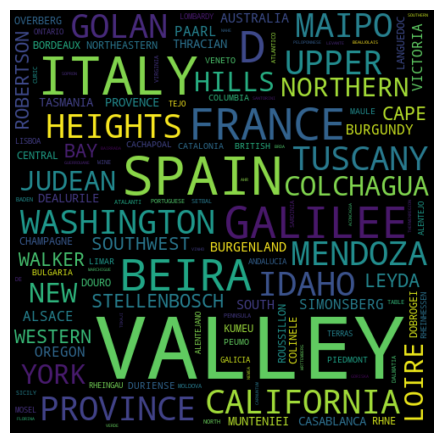

In [89]:
from wordcloud import WordCloud
# create text
province_list = list(wine3['province'].unique())
province_text = ' '.join(province_list).upper()
province_text = province_text.replace('√','').replace('¥','').replace('≥','').replace('£O','').replace('≠','').replace('∫','').replace('º','').replace('&','')
province_text 
# generate visual
wordcloud = WordCloud(width = 500, height = 500, margin = 10).generate(province_text)
plt.imshow(wordcloud, interpolation = "bilinear")
plt.axis("off")
plt.margins(x = 0, y = 0)
plt.show()


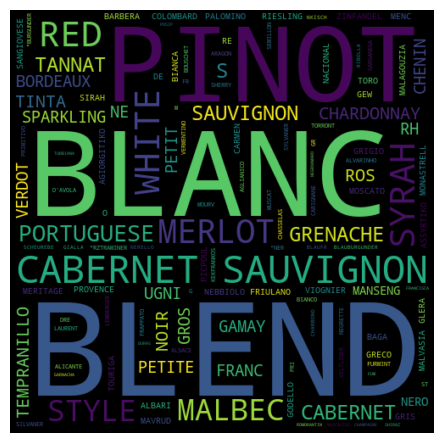

In [90]:
# create text
variety = list(wine3['variety'].unique())
variety_text = ' '.join(variety).upper() 
# generate visual
wordcloud = WordCloud(width = 500, height = 500, margin = 10).generate(variety_text)
plt.imshow(wordcloud, interpolation = "bilinear")
plt.axis("off")
plt.margins(x = 0, y = 0)
plt.show()
